In [33]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix

In [34]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [63]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

In [64]:
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from copy import copy
from sklearn.feature_selection import SelectFwe, f_classif




# Average CV score on the training set was: 0.86744
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        make_pipeline(
            make_union(
                FunctionTransformer(copy),
                FunctionTransformer(copy)
            ),
            SelectFwe(score_func=f_classif, alpha=0.037)
        )
    ),
    MultinomialNB(alpha=0.001, fit_prior=False)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(vectors, newsgroups_train.target)
results = exported_pipeline.predict(vectors_test)

In [40]:
print(classification_report(newsgroups_test.target,results))

              precision    recall  f1-score   support

           0       0.32      0.51      0.39       319
           1       0.65      0.74      0.69       389
           2       0.68      0.54      0.60       394
           3       0.62      0.69      0.65       392
           4       0.74      0.69      0.72       385
           5       0.82      0.76      0.79       395
           6       0.85      0.74      0.79       390
           7       0.77      0.73      0.75       396
           8       0.80      0.75      0.77       398
           9       0.94      0.80      0.87       397
          10       0.93      0.91      0.92       399
          11       0.75      0.76      0.75       396
          12       0.70      0.56      0.63       393
          13       0.85      0.78      0.81       396
          14       0.76      0.79      0.77       394
          15       0.65      0.82      0.73       398
          16       0.59      0.72      0.65       364
          17       0.83    

In [41]:
print(confusion_matrix(newsgroups_test.target,results))

[[162   0   1   2   2   3   0   3   2   1   2   2   1   3   9  56   7  13
   13  37]
 [  9 287  15  12  13  24   3   0   2   0   0  10   1   0   7   2   0   1
    1   2]
 [ 18  33 211  53   7  29   3   2   5   0   0   8   4   2  10   1   0   0
    4   4]
 [  7  13  29 270  30   2   9   1   0   1   1   5  21   0   1   0   0   0
    2   0]
 [ 14  11  14  30 266   2   9   5   1   0   0   6  16   2   5   2   0   0
    1   1]
 [  6  45  15   7   4 300   3   0   0   1   0   3   4   1   3   1   1   0
    0   1]
 [  9   2   2  26  16   0 290  12   8   1   2   1   8   0   1   3   3   0
    5   1]
 [ 26   1   2   0   0   0   8 291  23   1   1   5   9   3   7   3   5   1
    9   1]
 [ 19   3   1   1   2   0   4  19 298   1   0   0  10   5   6   1  10   3
   10   5]
 [ 19   3   0   0   0   1   1   2   3 319  17   5   1   3   3   4   4   2
    7   3]
 [ 16   0   0   0   0   1   0   0   1   4 365   1   0   1   2   3   4   0
    0   1]
 [ 21   6   6   3   4   1   0   0   4   3   0 300   5   1   5   1

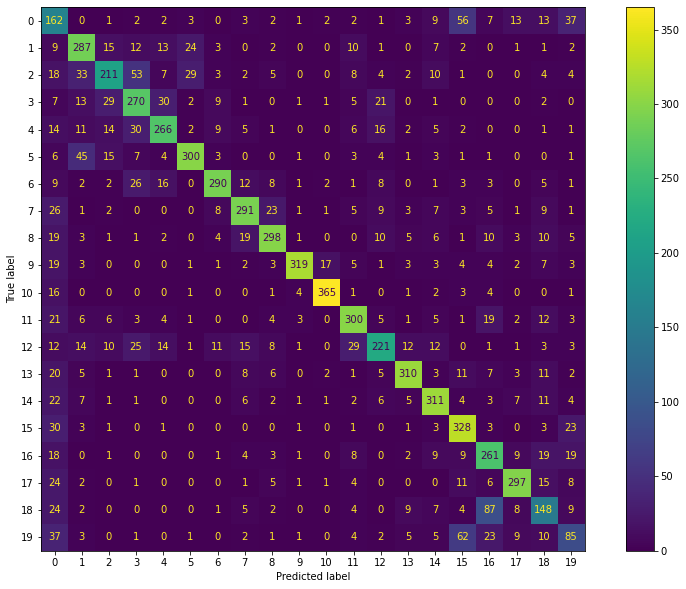

In [83]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(exported_pipeline, vectors_test, newsgroups_test.target, ax=ax)
plt.show()

In [14]:
print(accuracy_score(newsgroups_test.target, results))

0.7063197026022305


# Movie review Dataset

In [52]:
from sklearn.datasets import load_files
def load(path):
    df = load_files(f"{path}")

    return df

In [57]:
ROOT_PATH = "./datasets/"
train_path = f"{ROOT_PATH}aclImdb/train/"
test_path = f"{ROOT_PATH}aclImdb/test/"

In [58]:
train = load(train_path)
test = load(test_path)

In [59]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train.data)
vectors_test = vectorizer.transform(test.data)

In [60]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from copy import copy

# Average CV score on the training set was: 0.86744
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        SelectPercentile(score_func=f_classif, percentile=6)
    ),
    MultinomialNB(alpha=0.1, fit_prior=False)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(vectors, train.target)
results = exported_pipeline.predict(vectors_test)

In [19]:
print(classification_report(test.target,results))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84     12500
           1       0.86      0.79      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



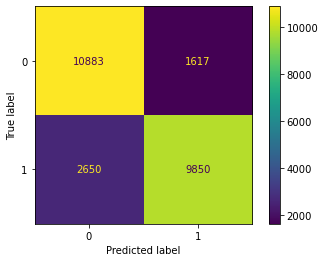

In [61]:
plot_confusion_matrix(exported_pipeline, vectors_test, test.target)

In [20]:
print(confusion_matrix(test.target,results))

[[10883  1617]
 [ 2650  9850]]


In [21]:
print(accuracy_score(test.target, results))

0.82932
